In [148]:
import numpy as np
from scipy import misc
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from skimage import transform
from skimage import filters
import tensorflow as tf
### Keras time ###
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.generic_utils import get_custom_objects
###.           ###
%matplotlib inline

(256, 256)
(256, 106)


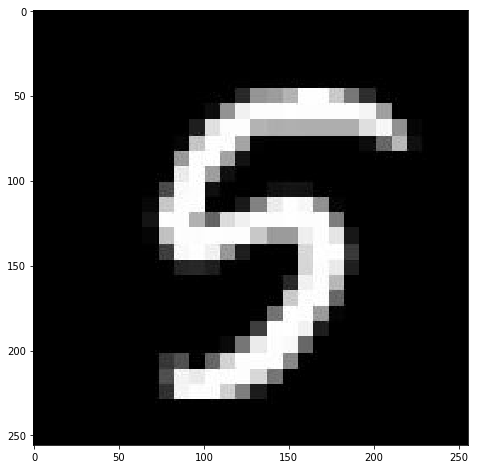

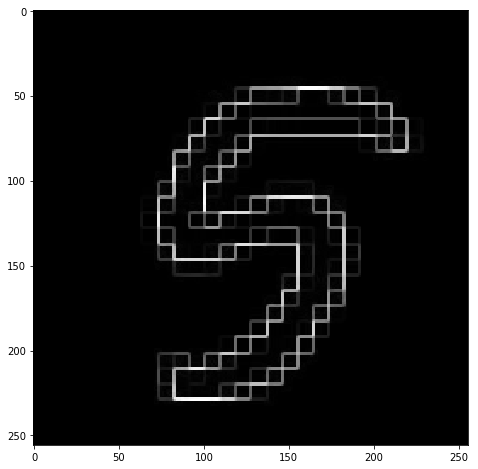

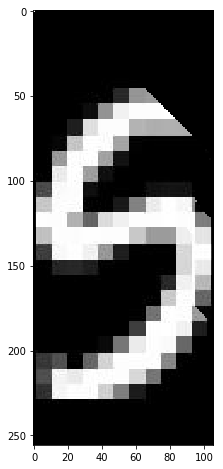

In [5]:
img = Image.open('5.jpg')
imgarr = np.array(img)
imgarr.reshape(256, 256, 1)

print(imgarr.shape)
plt.figure(figsize=(8,8))
plt.gray()
plt.imshow(imgarr, interpolation='nearest')
########################################
edge = filters.sobel(imgarr.astype('float'))
plt.figure(figsize=(8,8))
plt.gray()
plt.imshow(edge, interpolation='nearest')
########################################
carvedImg = transform.seam_carve(imgarr, edge, "vertical", 150)
edge = filters.sobel(carvedImg.astype('float'))
carvedImg[0][0] = 1
print(carvedImg.shape)
plt.figure(figsize=(8,8))
plt.gray()
plt.imshow(carvedImg, interpolation='nearest')

In [50]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [117]:
def smallImg(img, amt=10):
    img = img.reshape((28,28))
    edge = filters.sobel(img)
    cImg = transform.seam_carve(img, edge, "vertical", amt)
    return cImg
# Sanity check
# plt.figure()
# plt.imshow(smallImg(X_train[0]))
X_train.shape

(60000, 504)

In [88]:
### Keras mnist baseline tutorial with two image inputs###
(X_train, y_train), (X_test, y_test) = mnist.load_data()
origshape = X_train.shape[1] * X_train.shape[2]
num_pixels = X_train.shape[1] * X_train.shape[2] * 2
newX_train = []
newX_test = []
for i, xt in enumerate(X_train):
    xt = X_train[i].reshape(origshape)
    newX_train.append(np.concatenate([xt, xt]))
for i, xt in enumerate(X_test):
    xt = X_test[i].reshape(origshape)
    newX_test.append(np.concatenate([xt, xt]))
X_train = np.array(newX_train)
X_test = np.array(newX_test)
# X_train = X_train.reshape(X_train.shape[0], num_pixels)
# X_test = X_test.reshape(X_test.shape[0], num_pixels)
X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

# Comments
# slowwww
# higher baseline error

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 14s - loss: 0.2111 - acc: 0.9381 - val_loss: 0.1046 - val_acc: 0.9675
Epoch 2/10
 - 12s - loss: 0.0774 - acc: 0.9768 - val_loss: 0.0843 - val_acc: 0.9741
Epoch 3/10
 - 12s - loss: 0.0463 - acc: 0.9859 - val_loss: 0.0746 - val_acc: 0.9769
Epoch 4/10
 - 13s - loss: 0.0313 - acc: 0.9910 - val_loss: 0.0585 - val_acc: 0.9815
Epoch 5/10
 - 14s - loss: 0.0204 - acc: 0.9939 - val_loss: 0.0770 - val_acc: 0.9769
Epoch 6/10
 - 13s - loss: 0.0144 - acc: 0.9961 - val_loss: 0.0622 - val_acc: 0.9814
Epoch 7/10
 - 13s - loss: 0.0110 - acc: 0.9968 - val_loss: 0.0648 - val_acc: 0.9815
Epoch 8/10
 - 14s - loss: 0.0096 - acc: 0.9976 - val_loss: 0.0796 - val_acc: 0.9786
Epoch 9/10
 - 13s - loss: 0.0119 - acc: 0.9965 - val_loss: 0.0704 - val_acc: 0.9817
Epoch 10/10
 - 14s - loss: 0.0108 - acc: 0.9964 - val_loss: 0.0759 - val_acc: 0.9792
Baseline Error: 2.08%


# Seam Carving Example
Yields improvement of 2.08-1.79=.29% from altered baseline

Performs 1.81-1.79=.02% Better from baseline which is almost no difference at all

In [91]:
### Keras mnist baseline tutorial with one image input one seam carved input###

(X_train, y_train), (X_test, y_test) = mnist.load_data()
origshape = X_train.shape[1] * X_train.shape[2]
num_pixels = X_train.shape[1] * X_train.shape[2] + 28*13
newX_train = []
newX_test = []
for i, xt in enumerate(X_train):
    xt = X_train[i].reshape(origshape)
    xt2 = smallImg(X_train[i]).reshape(28*13)
    newX_train.append(np.concatenate([xt, xt2]))
for i, xt in enumerate(X_test):
    xt = X_test[i].reshape(origshape)
    xt2 = smallImg(X_test[i]).reshape(28*13)
    newX_test.append(np.concatenate([xt, xt2]))
X_train = np.array(newX_train)
X_test = np.array(newX_test)
# X_train = X_train.reshape(X_train.shape[0], num_pixels)
# X_test = X_test.reshape(X_test.shape[0], num_pixels)
X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
# Very little improvement but still Improvement
# not that slow after processing all of the data

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2538 - acc: 0.9280 - val_loss: 0.1366 - val_acc: 0.9604
Epoch 2/10
 - 7s - loss: 0.0984 - acc: 0.9715 - val_loss: 0.0920 - val_acc: 0.9707
Epoch 3/10
 - 7s - loss: 0.0621 - acc: 0.9817 - val_loss: 0.0725 - val_acc: 0.9776
Epoch 4/10
 - 8s - loss: 0.0421 - acc: 0.9874 - val_loss: 0.0686 - val_acc: 0.9780
Epoch 5/10
 - 7s - loss: 0.0290 - acc: 0.9924 - val_loss: 0.0673 - val_acc: 0.9779
Epoch 6/10
 - 7s - loss: 0.0204 - acc: 0.9946 - val_loss: 0.0621 - val_acc: 0.9809
Epoch 7/10
 - 7s - loss: 0.0155 - acc: 0.9960 - val_loss: 0.0565 - val_acc: 0.9830
Epoch 8/10
 - 7s - loss: 0.0108 - acc: 0.9975 - val_loss: 0.0610 - val_acc: 0.9813
Epoch 9/10
 - 7s - loss: 0.0078 - acc: 0.9984 - val_loss: 0.0620 - val_acc: 0.9809
Epoch 10/10
 - 7s - loss: 0.0052 - acc: 0.9992 - val_loss: 0.0614 - val_acc: 0.9821
Baseline Error: 1.79%


In [89]:
### Keras mnist baseline tutorial one image input ###
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2] 
# for i, _ in enumerate(X_train):
#     X_train = np.concatenate(X)
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2780 - acc: 0.9209 - val_loss: 0.1414 - val_acc: 0.9582
Epoch 2/10
 - 4s - loss: 0.1120 - acc: 0.9678 - val_loss: 0.0916 - val_acc: 0.9720
Epoch 3/10
 - 4s - loss: 0.0721 - acc: 0.9787 - val_loss: 0.0752 - val_acc: 0.9769
Epoch 4/10
 - 4s - loss: 0.0509 - acc: 0.9853 - val_loss: 0.0680 - val_acc: 0.9785
Epoch 5/10
 - 4s - loss: 0.0360 - acc: 0.9897 - val_loss: 0.0646 - val_acc: 0.9797
Epoch 6/10
 - 4s - loss: 0.0267 - acc: 0.9928 - val_loss: 0.0619 - val_acc: 0.9803
Epoch 7/10
 - 4s - loss: 0.0200 - acc: 0.9950 - val_loss: 0.0563 - val_acc: 0.9823
Epoch 8/10
 - 4s - loss: 0.0141 - acc: 0.9968 - val_loss: 0.0608 - val_acc: 0.9817
Epoch 9/10
 - 4s - loss: 0.0107 - acc: 0.9978 - val_loss: 0.0619 - val_acc: 0.9813
Epoch 10/10
 - 4s - loss: 0.0077 - acc: 0.9986 - val_loss: 0.0581 - val_acc: 0.9819
Baseline Error: 1.81%


In [125]:
### Keras mnist baseline tutorial with one seam carved input###
(X_train, y_train), (X_test, y_test) = mnist.load_data()
origshape = X_train.shape[1] * X_train.shape[2]
num_pixels = 28*13
newX_train = []
newX_test = []
for i, xt in enumerate(X_train):
    xt = X_train[i].reshape(origshape)
    xt = smallImg(X_train[i], amt=15).reshape(num_pixels)
    newX_train.append(xt)
for i, xt in enumerate(X_test):
    xt = X_test[i].reshape(origshape)
    xt = smallImg(X_test[i], amt=15).reshape(num_pixels)
    newX_test.append(xt)
X_train = np.array(newX_train)
X_test = np.array(newX_test)
# X_train = X_train.reshape(X_train.shape[0], num_pixels)
# X_test = X_test.reshape(X_test.shape[0], num_pixels)
X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

ValueError: cannot reshape array of size 364 into shape (784,)

In [126]:
### Keras mnist baseline tutorial with sobel edge input###
(X_train, y_train), (X_test, y_test) = mnist.load_data()
origshape = X_train.shape[1] * X_train.shape[2]
num_pixels = 28*28
newX_train = []
newX_test = []
for i, xt in enumerate(X_train):
    xt = X_train[i].reshape(origshape)
    xt = filters.sobel(X_train[i]).reshape(num_pixels)
    newX_train.append(xt)
for i, xt in enumerate(X_test):
    xt = X_test[i].reshape(origshape)
    xt = filters.sobel(X_test[i]).reshape(num_pixels)
    newX_test.append(xt)
X_train = np.array(newX_train)
X_test = np.array(newX_test)
# X_train = X_train.reshape(X_train.shape[0], num_pixels)
# X_test = X_test.reshape(X_test.shape[0], num_pixels)
X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 1.7004 - acc: 0.5568 - val_loss: 1.0349 - val_acc: 0.7527
Epoch 2/10
 - 3s - loss: 0.8140 - acc: 0.7842 - val_loss: 0.6528 - val_acc: 0.8288
Epoch 3/10
 - 3s - loss: 0.5876 - acc: 0.8358 - val_loss: 0.5201 - val_acc: 0.8580
Epoch 4/10
 - 3s - loss: 0.4957 - acc: 0.8562 - val_loss: 0.4581 - val_acc: 0.8709
Epoch 5/10
 - 3s - loss: 0.4495 - acc: 0.8672 - val_loss: 0.4255 - val_acc: 0.8765
Epoch 6/10
 - 4s - loss: 0.4218 - acc: 0.8743 - val_loss: 0.4053 - val_acc: 0.8813
Epoch 7/10
 - 3s - loss: 0.4028 - acc: 0.8791 - val_loss: 0.3884 - val_acc: 0.8868
Epoch 8/10
 - 3s - loss: 0.3884 - acc: 0.8821 - val_loss: 0.3797 - val_acc: 0.8878
Epoch 9/10
 - 3s - loss: 0.3770 - acc: 0.8854 - val_loss: 0.3685 - val_acc: 0.8913
Epoch 10/10
 - 3s - loss: 0.3665 - acc: 0.8885 - val_loss: 0.3583 - val_acc: 0.8957
Baseline Error: 10.43%


# Convolutional models

In [131]:
### https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py ###
### BASELINE ###

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 122s 2ms/step - loss: 0.2686 - acc: 0.9174 - val_loss: 0.0573 - val_acc: 0.9812
Epoch 2/12
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0887 - acc: 0.9741 - val_loss: 0.0386 - val_acc: 0.9872
Epoch 3/12
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0665 - acc: 0.9807 - val_loss: 0.0346 - val_acc: 0.9878
Epoch 4/12
 2432/60000 [>.............................] - ETA: 2:05 - loss: 0.0565 - acc: 0.9831

KeyboardInterrupt: 

In [147]:
### https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py ###
### Attempted seam carving ###

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

new_x_train = []
new_x_test = []
for i in x_train:
    i = i.reshape((28,28))
    new_x_train.append(filters.sobel(i))
for i in x_test:
    i = i.reshape((28,28))
    new_x_test.append(filters.sobel(i))
print(x_train.shape)
x_train = np.array(new_x_train)
print(x_train.shape)
x_test = np.array(new_x_test)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(60000, 28, 28)
(60000, 28, 28)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
 8960/60000 [===>..........................] - ETA: 1:34 - loss: 2.3019 - acc: 0.1172

KeyboardInterrupt: 

(1, 28, 28)


TypeError: Invalid dimensions for image data

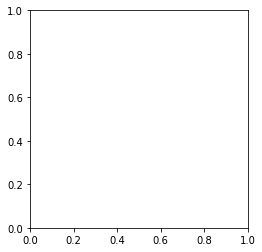

In [145]:
for i in X_train[0:5]:
#     i = i.reshape((28,28))
    print(i.shape)
    plt.figure()
    plt.imshow(i)

# Testing some other stuff

In [153]:
#### Custom activation funcitons, arctan ####

batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def custom_activation(x):
    return tf.atan(x)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation=custom_activation,
                 input_shape=input_shape))
model.add(Flatten())
model.add(Dense(128, activation=custom_activation))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 49s 815us/step - loss: 0.4022 - acc: 0.8786 - val_loss: 0.2329 - val_acc: 0.9322
Epoch 2/2
60000/60000 [==============================] - 45s 747us/step - loss: 0.2767 - acc: 0.9177 - val_loss: 0.1762 - val_acc: 0.9482
Test loss: 0.17617426008358597
Test accuracy: 0.9482


In [152]:
#### CFast baseline, simplified model ####

batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def custom_activation(x):
    return tf.atan(x)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 40s 664us/step - loss: 0.3569 - acc: 0.8920 - val_loss: 0.1169 - val_acc: 0.9654
Epoch 2/2
60000/60000 [==============================] - 52s 865us/step - loss: 0.1454 - acc: 0.9573 - val_loss: 0.0699 - val_acc: 0.9777
Test loss: 0.06991350756864995
Test accuracy: 0.9777


In [159]:
#### Custom activation funcitons, arctan ####

batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def custom_activation(x):
    return tf.ar

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation=custom_activation,
                 input_shape=input_shape))
model.add(Flatten())
model.add(Dense(128, activation=custom_activation))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 58s 968us/step - loss: 0.4516 - acc: 0.8694 - val_loss: 0.2987 - val_acc: 0.9149
Epoch 2/2
30848/60000 [==============>...............] - ETA: 26s - loss: 0.3597 - acc: 0.8984

KeyboardInterrupt: 